# COGS 108: Cinema-Income Correlation in the United States

Group members:

name,
name,
name,
name,
Shannon Chu

# Introduction and Background

The fluctuations of economy seem to affect every aspect of our lives. Such as, where we live, where we
eat, or even what movies we see. When median household incomes are not thriving, we tend to be more
cautious of our money. Individuals become less willing to spend money on non-necessities in order to get
by. We believe that during economic troubles most of an individual's household income is used to pay for
necessities such as mortgage payments and possibly to save up for an emergency that can arise such as
being unemployed. Therefore, individuals will be more hesitant to spend money on things such as watching
movies. We believe that movie’s revenue value during times of economic troubles will not be outstanding
due to the fact that individuals are not watching movies in a constant basis.

In addition, if and when individuals decide to go see a movie, those individuals will be more selective in the
movie they see. They might decide to watch a movie based on the actors in the movie or simply the genre of
the movie. We believe that during economic troubles, certain genres of movies will prosper over others
because people will tend to be more selective and narrow down the movies they decide to watch. We will
use data from GDP and from movie collected data to test our beliefs

### Background:

Since the year 2000, the domestic economy in the United States has experienced many ups and
downs. Historically, people have been forced to become more innovative to improve their quality of life in
times of scarcity, such as during the Great Depression or the 2008 recession. In that regard, we hypothesize
that people who watch movies in theaters when the economy is not doing well will be looking for an escape
from their daily lives and therefore give movies better ratings than in other years. In addition, we might find
a correlation with box office values with median household incomes. We hypothesize that box office values
will be negatively correlated with median household incomes.

Initially, we hypothesized that during years when the economy is bad and household incomes are
lower than usual, moviegoers will rate movies being played in theaters higher than in other years. However,
we can take this hypothesis a step further by also asking whether moviegoers will prefer to see specific
genres of movies during years when household incomes are low in comparison to genres preferred in years
when household incomes are higher. During economic falls, individuals usually will have a lower household
median income for their expenses and leisure activities. During such times individuals tend to spend less
money on leisure activities, such as going to the theaters. We assume that individuals will be more selective
with the movies they watch during economic troubles. This claim is an unsupported one and possibly
biased.

The aim of our project is finding trends in ratings and box office earnings of movies and movie
genres. Therefore, we need data with information about household incomes; this would be easiest to
accomplish with data from the United States using the US Census Bureau. We also need to collect
information about genres of movies and box office revenues of movies in and the year they aired.

# Hypothesis

When the economy is not doing well (people have relatively low income), we predict that box office/ratings
for movies, in general, will be higher. In addition, when in years where incomes are relatively low compared
to other years, moviegoers will gravitate toward specific genres of movies. On the other hand, when the
economy is doing well, moviegoers will prefer other genres of movies.

# Data Wrangling

We set out to find a dataset containing movie-data from 1984 to 2015. We believe that this
timeframe encompasses a variety of economic fluctuation such as the period of Reaganomics and
the 2008 recession that will allow us to find a distinction between movies watched during
outstanding economic times and economic struggles. More specifically, it will help us
distinguish genres, revenue values, and possibly ratings of movies. Because of the criteria we set,
we had to find a dataset containing average house-hold incomes ranging from 1984 to 2015.

# Dataset Descriptions

### Dataset: GDP

Dataset Description: This dataset contains data about the United States' GDP from 1947 to 2016

Link to dataset: https://query.data.world/s/gw6ftdnaltg55ldak7f5y45bj4hytx

### Dataset: TODO

Dataset Description:

Link to dataset:

# Loading and Cleaning Data

In [5]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#import cpi library to adjust GDP for inflation
import sys
!python -m pip install cpi --user
import cpi as cpi

The directory '/home/jovyan/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/jovyan/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.


### GDP

In [6]:
GDP_df = pd.read_excel('GDP-2.xls')

When we first look at GDP_df, we can see that there are many rows of cells containing NaN; those cells either contain notes or have been left blank by whoever created the dataset. Rows 0-8 contain a list of details about this dataset. Row 18 contains data column titles, and row 19 and onward contain dates formatted year-month-day and values in billions of US dollars. This dataset is a record of gross domestic product measured quarterly. See rows 0-8 in GDP_details_df below.

In [7]:
GDP_details_df = GDP_df.iloc[0:8,:]
GDP_details_df

,Title:,Gross Domestic Product
0,Series ID:,GDP
1,Source:,US. Bureau of Economic Analysis
2,Release:,Gross Domestic Product
3,Seasonal Adjustment:,Seasonally Adjusted Annual Rate
4,Frequency:,Quarterly
5,Units:,Billions of Dollars
6,Date Range:,1947-01-01 to 2016-01-01
7,Last Updated:,2016-05-27 7:56 AM CDT


Now isolated useful data, renumbered the indices, and added titles to the columns of data. We added titles to indicate the full date on which the data was collected and GDP in billions of US dollars.

In [8]:
GDP_df = GDP_df.iloc[19:295,:]
GDP_df.columns = ['DATE', 'GDP (in billions)']
GDP_df.index = range(276)

We also extracted the years from the 'DATE' column and placed the years in a new column 'YEARS', and then isolated only 'YEAR' and 'GDP' columns from GDP_df so we can sum quarterly measurements of GDP so we have annual measurements of GDP using groupby().

In [9]:
#extracting years from date column
GDP_df['YEAR'] = GDP_df['DATE'].dt.year
GDP_df = GDP_df[['DATE','YEAR','GDP (in billions)']]
#drop the 'DATE' column
GDP_df = GDP_df.drop('DATE',1)
#sum quarterly measurements of GDP so we get annual measurements of GDP
GDP_df = GDP_df.groupby(['YEAR']).sum()

Another major problem with GDP_df is that the GDP measurements have not been adjusted for inflation. We do so using the cpi library imported earlier.

In [10]:
#i = year
#GDP_df.at[i,'GDP'] is dollars

for i in GDP_df.index:    
    GDP_df.at[i,'GDP_adjusted (in billions)'] = cpi.inflate(GDP_df.at[i,'GDP (in billions)'], i, to = 2018)

In addition, due to restrictions of other datasets we are using, we are only interested in the years 1984 to 2015. We reduced GDP_df to match. We also exported a copy of GDP_df as a CSV file.

In [11]:
#trim GDP_df
GDP_df = GDP_df.loc[1984:2015,:]
#export GDP_df
cleaned_GDP_csv = GDP_df.to_csv (r'clean_GDP.csv')

#preview
GDP_df

,GDP (in billions),GDP_adjusted (in billions)
YEAR,,
1984,16162.8,39062.485270
1985,17387.0,40576.184099
1986,18360.5,42066.150306
1987,19480.9,43061.534827
1988,21010.5,44597.494704
1989,22630.8,45828.647545
1990,23918.3,45952.965249
1991,24696.2,45531.488204
1992,26157.2,46815.794871


### Another Dataset

In [14]:
#todo

# Data Exploration

### Visualization of GDP

We plotted GDP_df with years on the x-axis and adjusted GDP in billions on the y-axis to give us a better feel for the data. We can see a slight dip in GDP around 2008, which occurred due to the recession.

Text(0.5, 1.0, 'GDP from 1984 to 2015')

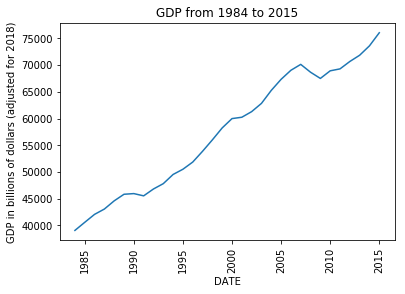

In [15]:
plt.plot(GDP_df['GDP_adjusted (in billions)'], '')
plt.xticks(rotation='vertical')
plt.xlabel('DATE')
plt.ylabel('GDP in billions of dollars (adjusted for 2018)')
plt.title('GDP from 1984 to 2015')

# Data Analysis and Results

### GDP

In [13]:
#todo

# Ethical Considerations, Privacy, and Other Key Points

TODO

manny?

# Conclusion and Discussion

TBD